<a href="https://colab.research.google.com/github/gnidetsanna/python_for_ML_tasks/blob/main/HW_2_7_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_hnidets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
!pip install opendatasets --upgrade --quiet

In [146]:
import opendatasets as od
import os

dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu'
os.listdir(data_dir)


Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu" (use force=True to force download)


['train.csv', 'test.csv', 'sample_submission.csv']

In [147]:
train_csv = data_dir + '/train.csv'
train_csv

'./bank-customer-churn-prediction-dlu/train.csv'

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [149]:
raw_df = pd.read_csv(train_csv)

In [150]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [151]:
raw_df.isnull().any().any()

False

In [152]:
updated_df = raw_df.drop(columns=['CustomerId'])

In [153]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.5+ MB


###Завдання 2###
Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [154]:
input_cols = updated_df[['id', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',  'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
target_col = updated_df['Exited']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_cols, target_col, test_size=0.25, random_state=42)

In [157]:
print('train_inputs.shape :', train_inputs.shape)
print('val_inputs.shape :', val_inputs.shape)
print('train_targets.shape :', train_targets.shape)
print('val_targets.shape :', val_targets.shape)

train_inputs.shape : (11250, 12)
val_inputs.shape : (3750, 12)
train_targets.shape : (11250,)
val_targets.shape : (3750,)


In [158]:
train_inputs.index[:10]

Index([7410, 10894, 1934, 11539, 2952, 8158, 7653, 13114, 11055, 7281], dtype='int64')

In [159]:
train_targets.index[:10]

Index([7410, 10894, 1934, 11539, 2952, 8158, 7653, 13114, 11055, 7281], dtype='int64')

In [160]:
val_inputs.index[:10]

Index([11499, 6475, 13167, 862, 5970, 6706, 3017, 3781, 3898, 2250], dtype='int64')

In [161]:
val_targets.index[:10]

Index([11499, 6475, 13167, 862, 5970, 6706, 3017, 3781, 3898, 2250], dtype='int64')

###Завдання 3###
Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [162]:
numeric_cols = updated_df.select_dtypes(include=['number']).columns.tolist()
numeric_inputs = updated_df.select_dtypes(include=['number']).drop(columns=['Exited','id']).columns.tolist()

In [163]:
categorical_cols = updated_df.select_dtypes(exclude=['number']).columns.tolist()

In [164]:
categorical_inputs = updated_df.select_dtypes(exclude=['number']).drop(columns=['Surname']).columns.tolist()

In [165]:
categorical_inputs

['Geography', 'Gender']

###Завдання 4###
Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

### Сратегія завдання###

1.   В нас немає пропущених значень
2.    Категоріальних колонок 3, з них одна прізвище - що явно не буде
      впливати на передбачення - одразу викидаєм
3.  Інші категоріальн

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaler = MinMaxScaler()

In [168]:
scaler.fit(train_inputs[numeric_inputs])

MinMaxScaler()

In [169]:
train_inputs[numeric_inputs] = scaler.transform(train_inputs[numeric_inputs])
val_inputs[numeric_inputs] = scaler.transform(val_inputs[numeric_inputs])

In [170]:
train_inputs[numeric_inputs].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,0.55,0.35,0.50,0.20,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.28,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.79
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [171]:
updated_df[categorical_cols].nunique()

Surname      764
Geography      3
Gender         2
dtype: int64

In [172]:
from sklearn.preprocessing import OneHotEncoder

In [173]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

In [174]:
encoder.fit(train_inputs[categorical_inputs])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [175]:
encoded_cols = list(encoder.get_feature_names_out(categorical_inputs))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [176]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_inputs])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_inputs])

In [177]:
display(train_inputs)

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
7410,7410,Galkin,0.568019,Germany,Female,0.196429,0.6,0.600483,0.333333,1.0,0.0,0.794453,0.0,1.0,0.0,0.0
10894,10894,Tsou,0.923628,France,Male,0.178571,0.7,0.000000,0.333333,1.0,0.0,0.514536,1.0,0.0,0.0,1.0
1934,1934,Folliero,0.381862,France,Female,0.285714,0.7,0.000000,0.333333,1.0,1.0,0.604264,1.0,0.0,0.0,0.0
11539,11539,Onyekachi,0.293556,Spain,Male,0.303571,0.3,0.000000,0.333333,1.0,1.0,0.049869,0.0,0.0,1.0,1.0
2952,2952,Fanucci,0.553699,Spain,Male,0.375000,0.8,0.000000,0.333333,1.0,0.0,0.619911,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,5191,Smith,0.377088,Spain,Male,0.196429,0.8,0.722742,0.000000,1.0,0.0,0.454430,0.0,0.0,1.0,1.0
13418,13418,Walker,0.439141,Germany,Male,0.232143,0.5,0.695885,0.333333,1.0,1.0,0.328034,0.0,1.0,0.0,1.0
5390,5390,Ch'iu,0.649165,Germany,Female,0.267857,0.1,0.557512,0.333333,1.0,0.0,0.673011,0.0,1.0,0.0,0.0
860,860,L?,0.396181,France,Male,0.232143,1.0,0.590512,0.000000,1.0,1.0,0.807618,1.0,0.0,0.0,1.0


In [178]:
display(val_inputs)

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
11499,11499,Onyekaozulu,0.536993,Germany,Male,0.321429,0.2,0.387906,0.333333,0.0,1.0,0.582344,0.0,1.0,0.0,1.0
6475,6475,Chidumaga,0.408115,France,Male,0.803571,0.5,0.440804,0.000000,1.0,0.0,0.884594,1.0,0.0,0.0,1.0
13167,13167,Chiu,0.610979,Germany,Male,0.267857,0.6,0.599930,0.333333,1.0,0.0,0.739828,0.0,1.0,0.0,1.0
862,862,Lucchese,0.355609,France,Male,0.500000,0.1,0.603414,0.000000,0.0,0.0,0.862275,1.0,0.0,0.0,1.0
5970,5970,Chien,0.601432,Spain,Female,0.303571,0.4,0.774393,0.000000,1.0,1.0,0.482479,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,2102,Tuan,0.603819,France,Male,0.607143,0.7,0.000000,0.333333,1.0,0.0,0.383035,1.0,0.0,0.0,1.0
13903,13903,Ts'ai,0.501193,France,Male,0.375000,0.7,0.000000,0.333333,0.0,0.0,0.513136,1.0,0.0,0.0,1.0
11863,11863,Ts'ai,0.591885,Germany,Female,0.339286,0.2,0.770245,0.000000,0.0,0.0,0.711130,0.0,1.0,0.0,0.0
2656,2656,Chin,0.494033,France,Male,0.517857,0.4,0.000000,0.000000,0.0,0.0,0.568223,1.0,0.0,0.0,1.0


###Завдання 5###
Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [179]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 16)
train_targets: (11250,)
val_inputs: (3750, 16)
val_targets: (3750,)


In [180]:
!pip install pyarrow --quiet

In [181]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [182]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 6.21 ms, sys: 1.94 ms, total: 8.15 ms
Wall time: 8.79 ms


###Завдання 6###
 З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
columns_to_drop = ['Surname', 'Geography', 'Gender' ]
x_t = pd.read_parquet('/content/train_inputs.parquet')
x_v = pd.read_parquet('/content/val_inputs.parquet')
X_train = x_t.drop(columns = columns_to_drop)
X_val = x_v.drop(columns = columns_to_drop)

In [185]:
print('train_inputs.shape :', X_train.shape)
print('val_inputs.shape :', X_val.shape)

train_inputs.shape : (11250, 13)
val_inputs.shape : (3750, 13)


In [186]:
model = LogisticRegression(solver='liblinear')

In [187]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [188]:
train_preds = model.predict(X_train)
predictions_val = model.predict(X_val)

In [189]:
train_probs = model.predict_proba(X_train)
train_probs


array([[0.47313735, 0.52686265],
       [0.88629455, 0.11370545],
       [0.84064565, 0.15935435],
       ...,
       [0.42994103, 0.57005897],
       [0.87993329, 0.12006671],
       [0.64007683, 0.35992317]])

In [190]:
np.argmax(train_probs, axis=1)

array([1, 0, 0, ..., 1, 0, 0])

(array([2803., 3179., 1985., 1249.,  799.,  470.,  279.,  212.,  200.,
          74.]),
 array([0.04117099, 0.11453127, 0.18789156, 0.26125185, 0.33461214,
        0.40797242, 0.48133271, 0.554693  , 0.62805329, 0.70141357,
        0.77477386]),
 <BarContainer object of 10 artists>)

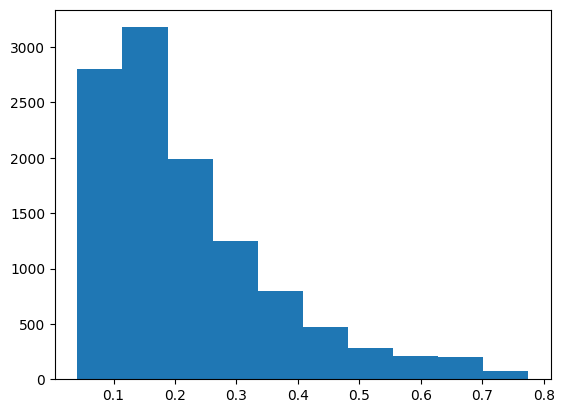

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(train_probs[:,1])

In [192]:
train_targets.value_counts(normalize=True)

Exited
0.0    0.798578
1.0    0.201422
Name: proportion, dtype: float64

###Завдання 7###
 Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [193]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_score(train_targets, train_preds)

0.8207111111111111

In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
confusion_matrix(train_targets, train_preds)

array([[8773,  211],
       [1806,  460]])

In [197]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 82.07%


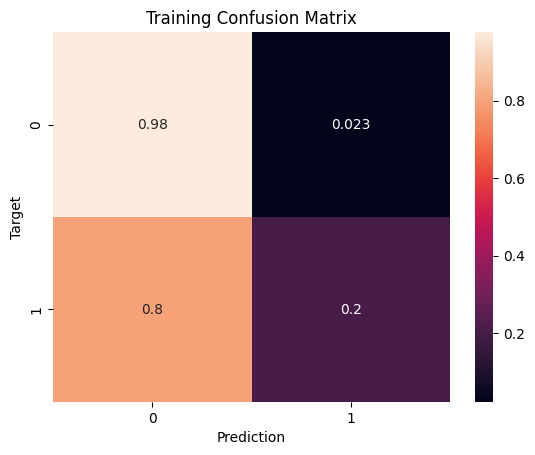

In [198]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 81.63%


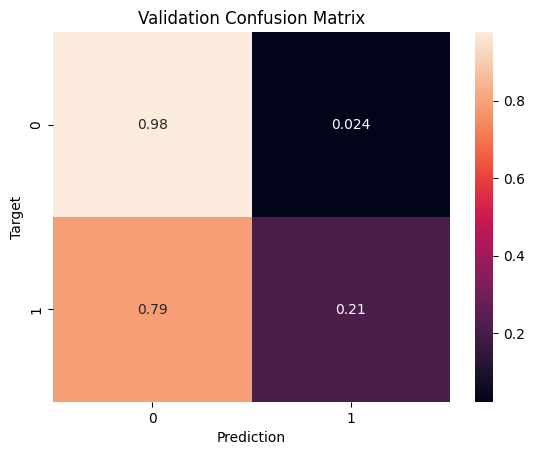

In [199]:
al_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [200]:
from sklearn.metrics import f1_score

In [201]:
preds = model.predict(X_train)

In [202]:
f1_score(train_targets, preds, pos_label=1)

0.3132448076268301

In [203]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.31%
F1 score Validation: 0.33%


In [204]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.79


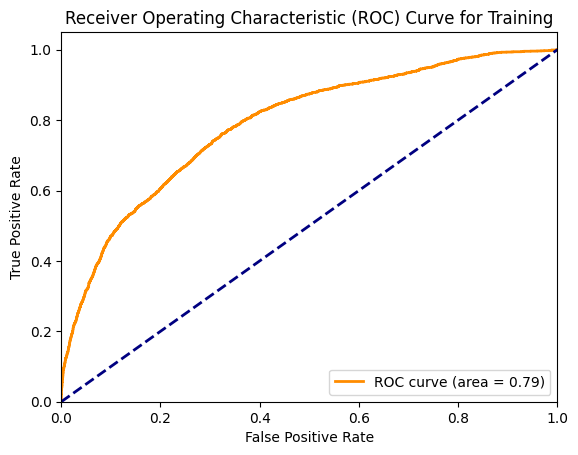

AUROC for Validation: 0.80


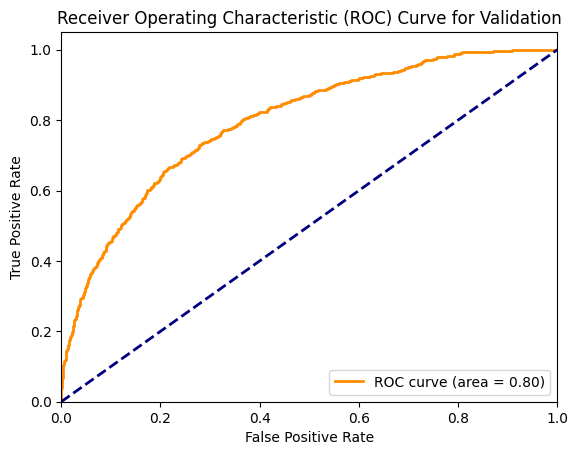

In [205]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

###Завдання 8###
Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [206]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

def all_no(inputs):
    return np.full(len(inputs), 0)

In [207]:
accuracy_score(train_targets, random_guess(X_train))

0.4958222222222222

In [208]:
accuracy_score(train_targets, all_no(X_train))

0.7985777777777778

In [209]:
accuracy_score(val_targets, random_guess(X_val))

0.4885333333333333

In [210]:
accuracy_score(val_targets, all_no(X_val))

0.7904

### Висновок 8 ###
Наша випадкова модель досягає точності 50%, а наша модель "завжди Ні" досягає точності 80%.
На щастя, наша модель краща за "дурну" або "випадкову" модель!

###Завдання 9###
 Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [211]:
import joblib

In [240]:
credit_exit = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'drop': columns_to_drop,
    'target_col': target_col,
    'numeric_cols': numeric_inputs,
    'categorical_cols': categorical_inputs,
    'encoded_cols': encoded_cols
}

In [241]:
joblib.dump(credit_exit, 'credit_exit.joblib')

['credit_exit.joblib']

In [242]:
model_2 = joblib.load('credit_exit.joblib')

###Завдання 10###
Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [259]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, columns_to_drop, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    key = input_df.drop(columns = columns_to_drop)
    X_input = key[['id'] + numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [260]:
predict_raw_df(scaler, encoder, numeric_inputs, categorical_inputs, columns_to_drop, raw_df[:5])

array([0.15017268, 0.17489697, 0.35078957, 0.47905383, 0.77477386])

###Завдання 11###
Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [291]:
test_csv = data_dir + '/test.csv'
test_raw_df = pd.read_csv(test_csv)

In [292]:
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [293]:
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_inputs, categorical_inputs, columns_to_drop, test_raw_df)

In [294]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,1.0,0.194960
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,1.0,0.058754
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,1.0,0.129842
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,1.0,0.075040
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,1.0,0.057913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,0.496420,Spain,Male,0.357143,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,1.0,0.034031
9996,24996,15739271.0,Clements,0.589499,Spain,Male,0.375000,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,1.0,0.034635
9997,24997,15756743.0,Chidiebere,0.818616,France,Male,0.214286,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,1.0,0.068355
9998,24998,15680167.0,Yermakova,0.391408,France,Male,0.357143,0.6,0.690650,0.000000,1.0,0.0,0.632348,1.0,0.0,0.0,1.0,0.127260


###Завдання 12###
 Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [295]:
sub_csv = data_dir + '/sample_submission.csv'

In [296]:
sub_csv = pd.read_csv(sub_csv)

In [297]:
sub_csv.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [298]:
for idx in test_raw_df.index:
    if sub_csv.at[idx, 'id'] == test_raw_df.at[idx, 'id']:
      sub_csv.at[idx, 'Exited'] = test_raw_df.at[idx, 'Exited']
    else:
      continue

In [299]:
sub_csv.head()

,id,Exited
0,15000,0.194960
1,15001,0.058754
2,15002,0.129842
3,15003,0.075040
4,15004,0.057913


In [301]:
sub_csv.to_csv('submission_log_reg.csv', index=False)